In [ ]:
from fbprophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
import io
from google.colab import files

data_to_load = files.upload()
df = pd.read_csv(io.BytesIO(data_to_load['Argentina.csv']))
data = pd.DataFrame({'ds': df['Date'], 'y': df['Total Cases']})

Saving Argentina.csv to Argentina (2).csv


In [ ]:
m = Prophet(interval_width=0.95)
m.fit(data)
future = m.make_future_dataframe(periods=30)
future.tail()

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
148,2020-07-29
149,2020-07-30
150,2020-07-31
151,2020-08-01
152,2020-08-02


In [ ]:
forcast = m.predict(future)
forcast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
148,2020-07-29,107605.980001,100392.990211,114838.790576
149,2020-07-30,109362.622173,101929.490519,116695.552159
150,2020-07-31,111172.808557,103403.761238,119089.153611
151,2020-08-01,112728.820041,104386.111130,121091.733428
152,2020-08-02,114498.402418,105707.539047,123029.102606


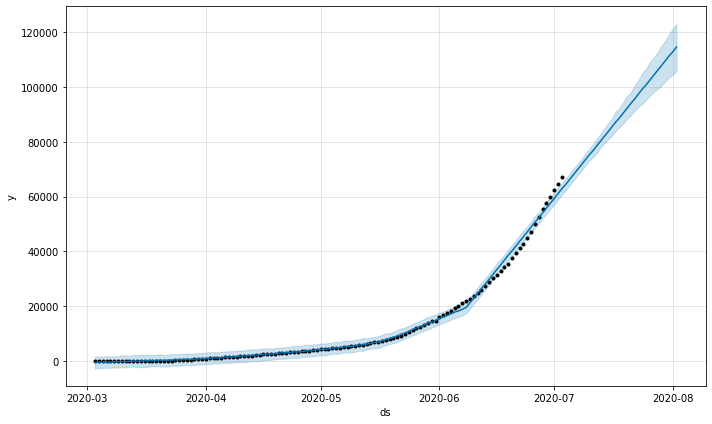

In [ ]:
cfp = m.plot(forcast)

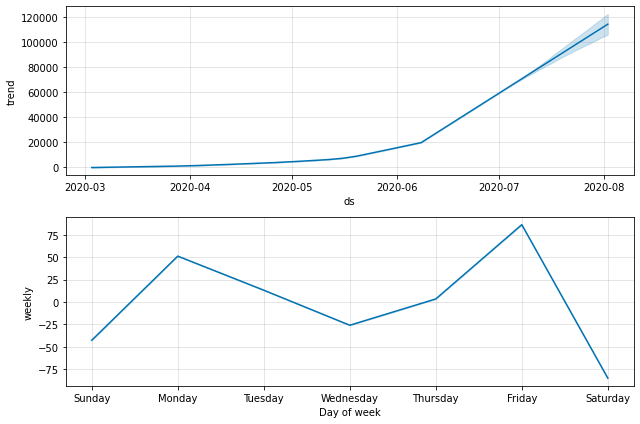

In [ ]:
cfp = m.plot_components(forcast)